<a href="https://colab.research.google.com/github/italolima04/estudo-covid-19-quixada/blob/master/Estudo_COVID_Quixad%C3%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas e Dados

In [86]:
#Importando as bibliotecas.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from fbprophet import Prophet

In [87]:
#Importando os dados e criando um Data Frame a partir destes.
df = pd.read_csv('Covid-Qxd.csv')

# Explorando dados

In [88]:
#Visualizando às 5 primeiras linhas do Data Frame.
df.head()

,data,confirmados,recuperados,obitos
0,03/20/2020,0,0,0
1,03/21/2020,0,0,0
2,03/22/2020,0,0,0
3,03/23/2020,0,0,0
4,03/24/2020,0,0,0


In [89]:
#Visualizando às 5 últimas linhas do Data Frame.
df.tail()

,data,confirmados,recuperados,obitos
100,06/28/2020,2160,1688,49
101,06/29/2020,2189,1754,50
102,06/30/2020,2225,1781,50
103,07/01/2020,2248,1853,50
104,07/02/2020,2292,1926,51


In [90]:
#Verificando a estrutura do Data Frame.
df.shape

(105, 4)

# Manipulando Dados

**Feature Engineering -> Criação de uma Nova Coluna a partir de outras já existentes no Data Frame.**

In [91]:
#A Taxa de Mortalidade é calculada a partir da divisão do número de óbitos / casos confirmados. 
death_rate = df['obitos'] / df['confirmados']
#Multiplica-se por 100 para obter esse valor em porcentagem.
death_rate = death_rate * 100 
#Formatando o resultado para somente 2 casas decimais.
death_rate = death_rate.round(2)
death_rate

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
100    2.27
101    2.28
102    2.25
103    2.22
104    2.23
Length: 105, dtype: float64

In [92]:
#Criando uma coluna no Data Frame e preenchendo-a com os dados criados acima.
df['taxa_mortalidade'] = death_rate
df

,data,confirmados,recuperados,obitos,taxa_mortalidade
0,03/20/2020,0,0,0,NaN
1,03/21/2020,0,0,0,NaN
2,03/22/2020,0,0,0,NaN
3,03/23/2020,0,0,0,NaN
4,03/24/2020,0,0,0,NaN
...,...,...,...,...,...
100,06/28/2020,2160,1688,49,2.27
101,06/29/2020,2189,1754,50,2.28
102,06/30/2020,2225,1781,50,2.25
103,07/01/2020,2248,1853,50,2.22


**Pode-se observar que nos primeiros dias, como não havia óbitos registrados, o númerador da nossa divisão é 0, e o resultado desta gera um valor NaN, podemos tratar esses dados.**

In [93]:
#Verificando a quantidade de Valores Nulos por Coluna.
df.isna().sum()

data                0
confirmados         0
recuperados         0
obitos              0
taxa_mortalidade    8
dtype: int64

In [94]:
df['taxa_mortalidade'].isna()

0       True
1       True
2       True
3       True
4       True
       ...  
100    False
101    False
102    False
103    False
104    False
Name: taxa_mortalidade, Length: 105, dtype: bool

In [95]:
#Atualizando o Data Frame a partir da aplicação do Método fillna() que substitui os valores nulos por 0.
df.update(df['taxa_mortalidade'].fillna(0))
df

,data,confirmados,recuperados,obitos,taxa_mortalidade
0,03/20/2020,0,0,0,0.00
1,03/21/2020,0,0,0,0.00
2,03/22/2020,0,0,0,0.00
3,03/23/2020,0,0,0,0.00
4,03/24/2020,0,0,0,0.00
...,...,...,...,...,...
100,06/28/2020,2160,1688,49,2.27
101,06/29/2020,2189,1754,50,2.28
102,06/30/2020,2225,1781,50,2.25
103,07/01/2020,2248,1853,50,2.22


In [96]:
#A Taxa de Recuperados pode ser calculada a partir da divisão do número de recuperados / casos confirmados. 
recovered_rate = df['recuperados'] / df['confirmados']
#Multiplica-se por 100 para obter esse valor em porcentagem.
recovered_rate = recovered_rate * 100 
#Formatando o resultado para somente 2 casas decimais.
recovered_rate = recovered_rate.round(2)
recovered_rate

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
100    78.15
101    80.13
102    80.04
103    82.43
104    84.03
Length: 105, dtype: float64

In [97]:
#Criando uma coluna no Data Frame e preenchendo-a com os dados criados acima.
df['taxa_recuperados'] = recovered_rate
df

,data,confirmados,recuperados,obitos,taxa_mortalidade,taxa_recuperados
0,03/20/2020,0,0,0,0.00,NaN
1,03/21/2020,0,0,0,0.00,NaN
2,03/22/2020,0,0,0,0.00,NaN
3,03/23/2020,0,0,0,0.00,NaN
4,03/24/2020,0,0,0,0.00,NaN
...,...,...,...,...,...,...
100,06/28/2020,2160,1688,49,2.27,78.15
101,06/29/2020,2189,1754,50,2.28,80.13
102,06/30/2020,2225,1781,50,2.25,80.04
103,07/01/2020,2248,1853,50,2.22,82.43


**Pode-se observar que nos primeiros dias, como não pessoas recuperadas, o númerador da nossa divisão é 0, e o resultado desta gera um valor NaN, podemos tratar esses dados.**

In [98]:
#Verificando a quantidade de Valores Nulos por Coluna.
df.isna().sum()

data                0
confirmados         0
recuperados         0
obitos              0
taxa_mortalidade    0
taxa_recuperados    8
dtype: int64

In [99]:
df['taxa_recuperados'].isna()

0       True
1       True
2       True
3       True
4       True
       ...  
100    False
101    False
102    False
103    False
104    False
Name: taxa_recuperados, Length: 105, dtype: bool

In [100]:
#Atualizando o Data Frame a partir da aplicação do Método fillna() que substitui os valores nulos por 0.
df.update(df['taxa_recuperados'].fillna(0))
df

,data,confirmados,recuperados,obitos,taxa_mortalidade,taxa_recuperados
0,03/20/2020,0,0,0,0.00,0.00
1,03/21/2020,0,0,0,0.00,0.00
2,03/22/2020,0,0,0,0.00,0.00
3,03/23/2020,0,0,0,0.00,0.00
4,03/24/2020,0,0,0,0.00,0.00
...,...,...,...,...,...,...
100,06/28/2020,2160,1688,49,2.27,78.15
101,06/29/2020,2189,1754,50,2.28,80.13
102,06/30/2020,2225,1781,50,2.25,80.04
103,07/01/2020,2248,1853,50,2.22,82.43


**A nível de exploração, podemos Verificar a Porcentagem entre Casos Abertos e Fechados**

Um caso é dito aberto quando o paciente ainda se encontra doente(dado que testou positivo para o exame de COVID).

Um caso é dito fechado em duas possíveis situações: 

1.  Se o paciente se recuperou

2.  Se o paciente veio a óbito




In [101]:
#Calculando a quantidade de Casos fechados.
closed_cases = df['obitos'][(df['obitos'].size - 1)] + df['recuperados'][(df['recuperados'].size - 1)]
closed_cases

1977

In [102]:
#Porcentagem de Casos fechados em relação ao total.
((closed_cases/df['confirmados'][(df['confirmados'].size - 1)]) * 100).round(2)

86.26

In [103]:
#Calculando a quantidade de Casos abertos.
open_cases = ((df['confirmados'][(df['confirmados'].size - 1)]) - closed_cases)
open_cases

315

In [104]:
#Porcentagem de Casos abertos em relação ao total.
((open_cases/df['confirmados'][(df['confirmados'].size - 1)]) * 100).round(2)

13.74

In [105]:
#Verificando a Descrição Estatística dos Dados.
df.describe()

,confirmados,recuperados,obitos,taxa_mortalidade,taxa_recuperados
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,612.447619,411.171429,15.180952,1.508571,47.364857
std,769.522342,563.128802,18.621111,1.285434,30.817585
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000
50%,112.000000,62.000000,2.000000,2.130000,56.880000
75%,1259.000000,794.000000,34.000000,2.560000,68.480000
max,2292.000000,1926.000000,51.000000,4.320000,90.910000


**A partir dessa descrição podemos fazer algumas observações, como:**

O Desvio Padrão tem valor muito elevado para os casos confirmados e recuperados pela grande variação que esses apresentam (crescimento).

A taxa de mortalidade máxima para a cidade de Quixadá foi 4.32%, ou seja, em seu ápice esse valor ainda é menor que a taxa atual para o Brasil. Taxa no Brasil no dia 24/06/2020: 4.6%

# Visualizando Gráficos

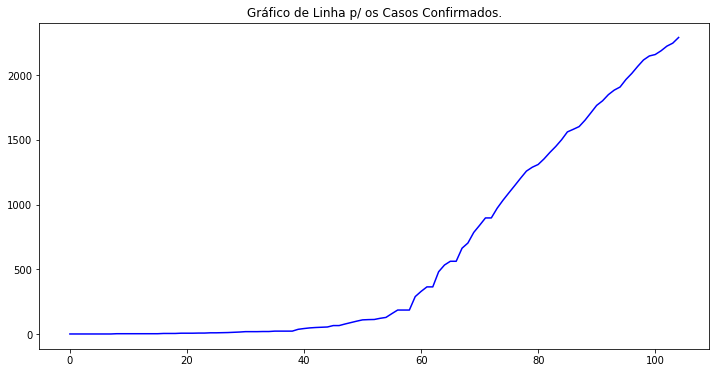

In [106]:
df['confirmados'].plot(figsize=(12, 6), color='blue')
plt.title('Gráfico de Linha p/ os Casos Confirmados.')
plt.show()

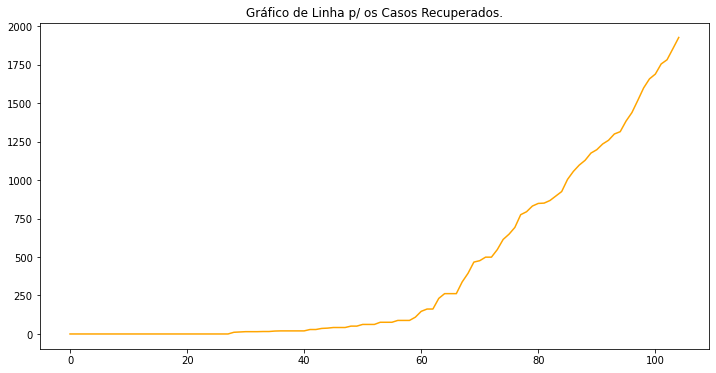

In [107]:
df['recuperados'].plot(figsize=(12, 6), color='orange')
plt.title('Gráfico de Linha p/ os Casos Recuperados.')
plt.show()

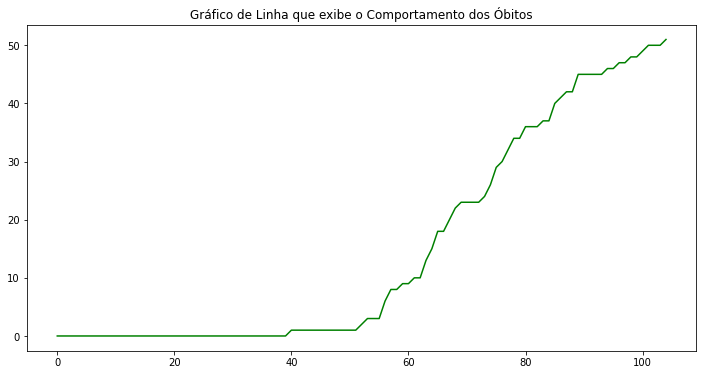

In [108]:
df['obitos'].plot(figsize=(12, 6), color='green')
plt.title('Gráfico de Linha que exibe o Comportamento dos Óbitos')
plt.show()

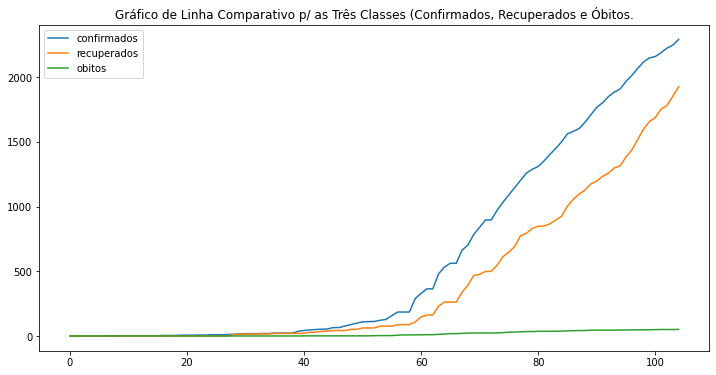

In [109]:
df_plot = df[['confirmados', 'recuperados', 'obitos']]
df_plot.plot(figsize=(12, 6))
plt.title('Gráfico de Linha Comparativo p/ as Três Classes (Confirmados, Recuperados e Óbitos.')
plt.show()

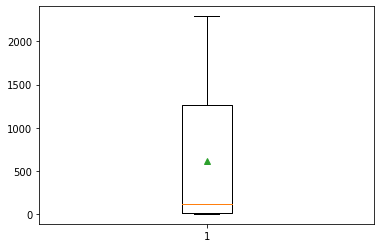

In [110]:
#Gráfico de Caixa p/ os Confirmados.
plt.boxplot(df['confirmados'], showmeans=True);

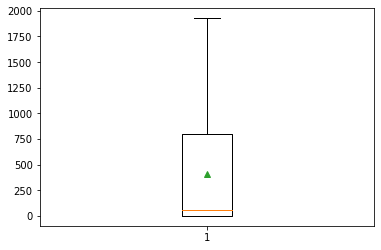

In [111]:
#Gráfico de Caixa p/ os Recuperados.
plt.boxplot(df['recuperados'], showmeans=True);

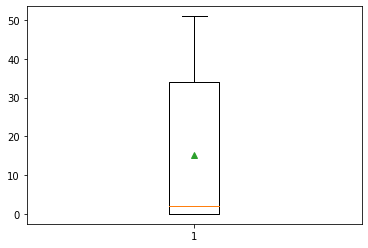

In [112]:
#Gráfico de Caixa p/ os Óbitos.
plt.boxplot(df['obitos'], showmeans=True);

#Formatando os Dados

**Prophet From Facebook**

O Prophet é um framework do Facebook e segue o modelo de API Scikit Learn (Biblioteca de Machine Learning bastente utilizada).
Ou seja: Primeiro cria-se uma instância da classe prophet e depois utiliza os métodos **fit** e **predict**. 

O Prophet tem seu backend programado em uma linguagem de programação probabilística chamada STAN, cuja é baseada nas estatísticas bayesianas e por isso pode oferecer vantagens para esses tipos de estudos.
Ex: Intervalos de Confiança

**Intervalo de Confiança**

Utilizaremos um intervalo de 95% de confiança, ou seja, teremos 5% de significância. Medida bastante utilizada para pesquisas.

Mas o que é um intervalo de confiança ?

Um intervalo de Confiança pode ser representado da seguinte forma:

c = média amostral - margem de erro < média populacional < média amostral + margem de erro

ds é uma coluna de date e deve possuir o formato esperado pelo Pandas: AAAA-MM-DD

y deve ser uma coluna numérica e representa a medida que desejamos prever

2 Critérios: 

1- Renomear colunas de acordo com o exigido pelo Prophet

2- Formatar data de acordo com o exigido pelo Prophet

In [113]:
#Criando Data Frame Vazio.
confirmed = pd.DataFrame()
#Criando coluna de Data e formatando esses dados para o Prophet.
confirmed['ds'] = pd.to_datetime(df['data'])
#Criando coluna de confirmados para o novo Data Frame.
confirmed['y'] = df['confirmados']
#Visualizando às 5 últimas linhas.
confirmed.tail()

,ds,y
100,2020-06-28,2160
101,2020-06-29,2189
102,2020-06-30,2225
103,2020-07-01,2248
104,2020-07-02,2292


In [114]:
#Verificando o formato dos dados.
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      105 non-null    datetime64[ns]
 1   y       105 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [115]:
#Criando Data Frame Vazio.
deaths = pd.DataFrame()
#Criando coluna de Data e formatando esses dados para o Prophet.
deaths['ds'] = pd.to_datetime(df['data'])
#Criando coluna de confirmados para o novo Data Frame.
deaths['y'] = df['obitos']
#Visualizando às 5 últimas linhas.
deaths.tail()

,ds,y
100,2020-06-28,49
101,2020-06-29,50
102,2020-06-30,50
103,2020-07-01,50
104,2020-07-02,51


In [116]:
#Verificando o formato dos dados.
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      105 non-null    datetime64[ns]
 1   y       105 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


# Instanciando e Configurando o Prophet para os dados de Confirmados

In [117]:
#Criando instância da Classe Prophet e estabelecendo o Nível de Confiança.
prophet = Prophet(interval_width=0.95)

In [118]:
#Treinando o Modelo.
prophet.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Será feita uma previsão para os próximos 7, 15 e 30 dias.**

# Prevendo o Número de Confirmados para os Próximos 7 dias

In [119]:
#Parâmetro que recebe a quantidade de dias.
confirmed_7 = prophet.make_future_dataframe(periods=7)
#Verificando quais serão esses próximos x dias
confirmed_7.tail(7)

,ds
105,2020-07-03
106,2020-07-04
107,2020-07-05
108,2020-07-06
109,2020-07-07
110,2020-07-08
111,2020-07-09


In [120]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(confirmed_7)
prevision.tail(7)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
105,2020-07-03,2370.786175,2352.749996,2406.103681,2368.682955,2372.582855,9.132353,9.132353,9.132353,9.132353,9.132353,9.132353,0.0,0.0,0.0,2379.918528
106,2020-07-04,2412.192823,2392.575052,2447.726914,2404.414041,2419.297098,8.615643,8.615643,8.615643,8.615643,8.615643,8.615643,0.0,0.0,0.0,2420.808467
107,2020-07-05,2453.599472,2419.459829,2480.633228,2439.838896,2465.995273,-4.448445,-4.448445,-4.448445,-4.448445,-4.448445,-4.448445,0.0,0.0,0.0,2449.151026
108,2020-07-06,2495.006120,2454.609586,2519.866317,2475.319466,2513.343030,-7.471007,-7.471007,-7.471007,-7.471007,-7.471007,-7.471007,0.0,0.0,0.0,2487.535113
109,2020-07-07,2536.412768,2496.947976,2572.544986,2509.257282,2562.612304,-1.998808,-1.998808,-1.998808,-1.998808,-1.998808,-1.998808,0.0,0.0,0.0,2534.413960
110,2020-07-08,2577.819416,2531.587917,2617.242436,2543.210227,2612.849058,-2.989129,-2.989129,-2.989129,-2.989129,-2.989129,-2.989129,0.0,0.0,0.0,2574.830287
111,2020-07-09,2619.226065,2568.993650,2666.414574,2575.600551,2663.363400,-0.840607,-0.840607,-0.840607,-0.840607,-0.840607,-0.840607,0.0,0.0,0.0,2618.385458


In [121]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(7)

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-03,2352.749996,2379.918528,2406.103681
106,2020-07-04,2392.575052,2420.808467,2447.726914
107,2020-07-05,2419.459829,2449.151026,2480.633228
108,2020-07-06,2454.609586,2487.535113,2519.866317
109,2020-07-07,2496.947976,2534.413960,2572.544986
110,2020-07-08,2531.587917,2574.830287,2617.242436
111,2020-07-09,2568.993650,2618.385458,2666.414574


In [122]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(7).round()

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-03,2353.0,2380.0,2406.0
106,2020-07-04,2393.0,2421.0,2448.0
107,2020-07-05,2419.0,2449.0,2481.0
108,2020-07-06,2455.0,2488.0,2520.0
109,2020-07-07,2497.0,2534.0,2573.0
110,2020-07-08,2532.0,2575.0,2617.0
111,2020-07-09,2569.0,2618.0,2666.0


Função que plota o gráfico exibindo a comparação entre linha dos dados e a da previsão (que se ajusta de acordo com o intervalo de confiança).


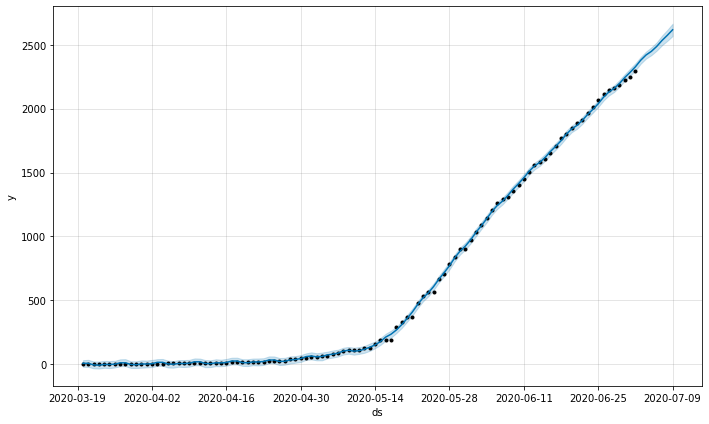

In [123]:
confirmed_fore_cast_plot =  prophet.plot(prevision)

# Prevendo o Número de Confirmados para os próximos 15 dias

In [124]:
#Parâmetro que recebe a quantidade de dias.
confirmed_15 = prophet.make_future_dataframe(periods=15)
#Verificando quais serão esses próximos x dias
confirmed_15.tail(15)

,ds
105,2020-07-03
106,2020-07-04
107,2020-07-05
108,2020-07-06
109,2020-07-07
110,2020-07-08
111,2020-07-09
112,2020-07-10
113,2020-07-11
114,2020-07-12


In [125]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(confirmed_15)
prevision.tail(15)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
105,2020-07-03,2370.786175,2352.141348,2407.540933,2369.161551,2372.128304,9.132353,9.132353,9.132353,9.132353,9.132353,9.132353,0.0,0.0,0.0,2379.918528
106,2020-07-04,2412.192823,2393.533038,2447.961012,2406.388187,2418.173111,8.615643,8.615643,8.615643,8.615643,8.615643,8.615643,0.0,0.0,0.0,2420.808467
107,2020-07-05,2453.599472,2420.135184,2477.760160,2442.416186,2465.800692,-4.448445,-4.448445,-4.448445,-4.448445,-4.448445,-4.448445,0.0,0.0,0.0,2449.151026
108,2020-07-06,2495.006120,2456.314437,2519.984009,2477.446488,2513.826200,-7.471007,-7.471007,-7.471007,-7.471007,-7.471007,-7.471007,0.0,0.0,0.0,2487.535113
109,2020-07-07,2536.412768,2500.669339,2566.869274,2511.810701,2563.839077,-1.998808,-1.998808,-1.998808,-1.998808,-1.998808,-1.998808,0.0,0.0,0.0,2534.413960
110,2020-07-08,2577.819416,2532.752644,2615.928693,2546.146429,2613.725471,-2.989129,-2.989129,-2.989129,-2.989129,-2.989129,-2.989129,0.0,0.0,0.0,2574.830287
111,2020-07-09,2619.226065,2572.574457,2662.970554,2577.286342,2664.532838,-0.840607,-0.840607,-0.840607,-0.840607,-0.840607,-0.840607,0.0,0.0,0.0,2618.385458
112,2020-07-10,2660.632713,2614.290816,2722.398288,2610.890821,2714.152262,9.132353,9.132353,9.132353,9.132353,9.132353,9.132353,0.0,0.0,0.0,2669.765066
113,2020-07-11,2702.039361,2648.194019,2774.762307,2642.744029,2764.207548,8.615643,8.615643,8.615643,8.615643,8.615643,8.615643,0.0,0.0,0.0,2710.655004
114,2020-07-12,2743.446009,2670.865754,2809.433000,2674.180473,2814.053919,-4.448445,-4.448445,-4.448445,-4.448445,-4.448445,-4.448445,0.0,0.0,0.0,2738.997564


In [126]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(15)

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-03,2352.141348,2379.918528,2407.540933
106,2020-07-04,2393.533038,2420.808467,2447.961012
107,2020-07-05,2420.135184,2449.151026,2477.760160
108,2020-07-06,2456.314437,2487.535113,2519.984009
109,2020-07-07,2500.669339,2534.413960,2566.869274
110,2020-07-08,2532.752644,2574.830287,2615.928693
111,2020-07-09,2572.574457,2618.385458,2662.970554
112,2020-07-10,2614.290816,2669.765066,2722.398288
113,2020-07-11,2648.194019,2710.655004,2774.762307
114,2020-07-12,2670.865754,2738.997564,2809.433000


In [127]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(15).round()

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-03,2352.0,2380.0,2408.0
106,2020-07-04,2394.0,2421.0,2448.0
107,2020-07-05,2420.0,2449.0,2478.0
108,2020-07-06,2456.0,2488.0,2520.0
109,2020-07-07,2501.0,2534.0,2567.0
110,2020-07-08,2533.0,2575.0,2616.0
111,2020-07-09,2573.0,2618.0,2663.0
112,2020-07-10,2614.0,2670.0,2722.0
113,2020-07-11,2648.0,2711.0,2775.0
114,2020-07-12,2671.0,2739.0,2809.0


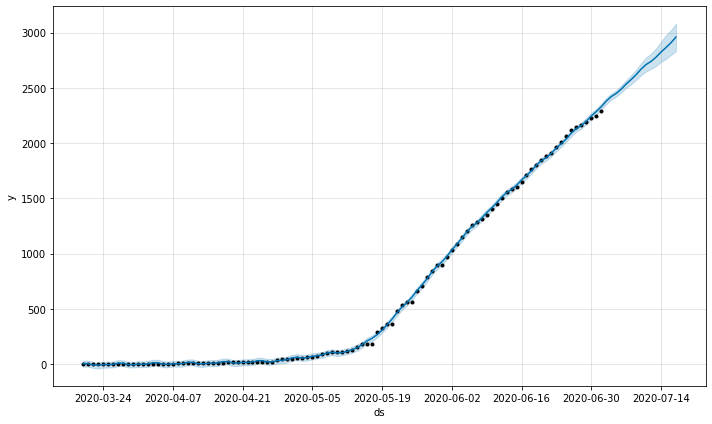

In [128]:
confirmed_fore_cast_plot =  prophet.plot(prevision)

# Prevendo o Número de Confirmados para os próximos 30 dias

In [129]:
#Parâmetro que recebe a quantidade de dias.
confirmed_30 = prophet.make_future_dataframe(periods=30)
#Verificando quais serão esses próximos x dias
confirmed_30.tail(30)

,ds
105,2020-07-03
106,2020-07-04
107,2020-07-05
108,2020-07-06
109,2020-07-07
110,2020-07-08
111,2020-07-09
112,2020-07-10
113,2020-07-11
114,2020-07-12


In [130]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(confirmed_30)
prevision.tail(30)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
105,2020-07-03,2370.786175,2354.245613,2408.966141,2369.243968,2372.913113,9.132353,9.132353,9.132353,9.132353,9.132353,9.132353,0.0,0.0,0.0,2379.918528
106,2020-07-04,2412.192823,2393.031730,2448.111551,2407.107464,2418.901785,8.615643,8.615643,8.615643,8.615643,8.615643,8.615643,0.0,0.0,0.0,2420.808467
107,2020-07-05,2453.599472,2419.814772,2476.765470,2442.931933,2466.947091,-4.448445,-4.448445,-4.448445,-4.448445,-4.448445,-4.448445,0.0,0.0,0.0,2449.151026
108,2020-07-06,2495.006120,2456.480868,2518.943361,2478.650178,2515.818441,-7.471007,-7.471007,-7.471007,-7.471007,-7.471007,-7.471007,0.0,0.0,0.0,2487.535113
109,2020-07-07,2536.412768,2499.105380,2568.428329,2513.829186,2564.201936,-1.998808,-1.998808,-1.998808,-1.998808,-1.998808,-1.998808,0.0,0.0,0.0,2534.413960
110,2020-07-08,2577.819416,2537.627103,2616.629280,2547.349133,2614.424326,-2.989129,-2.989129,-2.989129,-2.989129,-2.989129,-2.989129,0.0,0.0,0.0,2574.830287
111,2020-07-09,2619.226065,2569.558074,2669.477697,2580.999904,2664.525529,-0.840607,-0.840607,-0.840607,-0.840607,-0.840607,-0.840607,0.0,0.0,0.0,2618.385458
112,2020-07-10,2660.632713,2614.688398,2728.170763,2615.474618,2716.082118,9.132353,9.132353,9.132353,9.132353,9.132353,9.132353,0.0,0.0,0.0,2669.765066
113,2020-07-11,2702.039361,2646.159228,2780.089611,2646.864030,2769.132828,8.615643,8.615643,8.615643,8.615643,8.615643,8.615643,0.0,0.0,0.0,2710.655004
114,2020-07-12,2743.446009,2669.754910,2816.579486,2676.431272,2821.142920,-4.448445,-4.448445,-4.448445,-4.448445,-4.448445,-4.448445,0.0,0.0,0.0,2738.997564


In [131]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(30)

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-03,2354.245613,2379.918528,2408.966141
106,2020-07-04,2393.031730,2420.808467,2448.111551
107,2020-07-05,2419.814772,2449.151026,2476.765470
108,2020-07-06,2456.480868,2487.535113,2518.943361
109,2020-07-07,2499.105380,2534.413960,2568.428329
110,2020-07-08,2537.627103,2574.830287,2616.629280
111,2020-07-09,2569.558074,2618.385458,2669.477697
112,2020-07-10,2614.688398,2669.765066,2728.170763
113,2020-07-11,2646.159228,2710.655004,2780.089611
114,2020-07-12,2669.754910,2738.997564,2816.579486


In [132]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(30).round()

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-03,2354.0,2380.0,2409.0
106,2020-07-04,2393.0,2421.0,2448.0
107,2020-07-05,2420.0,2449.0,2477.0
108,2020-07-06,2456.0,2488.0,2519.0
109,2020-07-07,2499.0,2534.0,2568.0
110,2020-07-08,2538.0,2575.0,2617.0
111,2020-07-09,2570.0,2618.0,2669.0
112,2020-07-10,2615.0,2670.0,2728.0
113,2020-07-11,2646.0,2711.0,2780.0
114,2020-07-12,2670.0,2739.0,2817.0


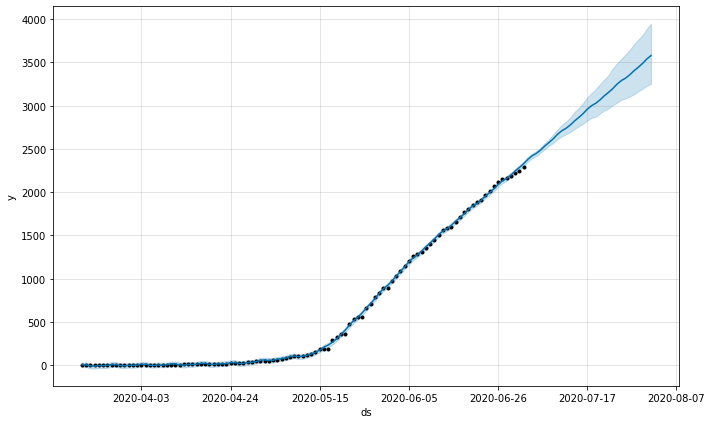

In [133]:
confirmed_fore_cast_plot =  prophet.plot(prevision)

**Observe que quanto maior a quantidade de dias, maior a "margem" de erro estabelecida, isso se dá devido a baixa quantidade de dados para o treinamento do modelo.**

# Instanciando e Configurando o Prophet para os dados de Mortes

In [134]:
#Criando instância da Classe Prophet e estabelecendo o Nível de Confiança.
prophet = Prophet(interval_width=0.95)

In [135]:
#Treinando o Modelo.
prophet.fit(deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Será feita uma previsão para os próximos 7, 15 e 30 dias.**

# Prevendo o Número de Mortes para os Próximos 7 dias

In [136]:
#Parâmetro que recebe a quantidade de dias.
deaths_7 = prophet.make_future_dataframe(periods=7)
#Verificando quais serão esses próximos x dias
deaths_7.tail(7)

,ds
105,2020-07-03
106,2020-07-04
107,2020-07-05
108,2020-07-06
109,2020-07-07
110,2020-07-08
111,2020-07-09


In [137]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(deaths_7)
prevision.tail(7)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
105,2020-07-03,52.839482,51.180869,54.515727,52.776666,52.898315,0.044451,0.044451,0.044451,0.044451,0.044451,0.044451,0.0,0.0,0.0,52.883932
106,2020-07-04,53.507967,52.048482,55.364874,53.283942,53.693955,0.162939,0.162939,0.162939,0.162939,0.162939,0.162939,0.0,0.0,0.0,53.670906
107,2020-07-05,54.176453,52.564346,55.799318,53.785829,54.508705,-0.004793,-0.004793,-0.004793,-0.004793,-0.004793,-0.004793,0.0,0.0,0.0,54.171660
108,2020-07-06,54.844939,53.215308,56.582038,54.227895,55.349297,0.025492,0.025492,0.025492,0.025492,0.025492,0.025492,0.0,0.0,0.0,54.870431
109,2020-07-07,55.513424,53.564046,57.091133,54.690562,56.215784,-0.126406,-0.126406,-0.126406,-0.126406,-0.126406,-0.126406,0.0,0.0,0.0,55.387018
110,2020-07-08,56.181910,54.429412,58.066760,55.121074,57.082629,0.079917,0.079917,0.079917,0.079917,0.079917,0.079917,0.0,0.0,0.0,56.261827
111,2020-07-09,56.850396,54.692950,58.454430,55.522534,57.981281,-0.181600,-0.181600,-0.181600,-0.181600,-0.181600,-0.181600,0.0,0.0,0.0,56.668796


In [138]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(7)

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-03,51.180869,52.883932,54.515727
106,2020-07-04,52.048482,53.670906,55.364874
107,2020-07-05,52.564346,54.171660,55.799318
108,2020-07-06,53.215308,54.870431,56.582038
109,2020-07-07,53.564046,55.387018,57.091133
110,2020-07-08,54.429412,56.261827,58.066760
111,2020-07-09,54.692950,56.668796,58.454430


In [139]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(7).round()

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-03,51.0,53.0,55.0
106,2020-07-04,52.0,54.0,55.0
107,2020-07-05,53.0,54.0,56.0
108,2020-07-06,53.0,55.0,57.0
109,2020-07-07,54.0,55.0,57.0
110,2020-07-08,54.0,56.0,58.0
111,2020-07-09,55.0,57.0,58.0


Função que plota o gráfico exibindo a comparação entre linha dos dados e a da previsão (que se ajusta de acordo com o intervalo de confiança).


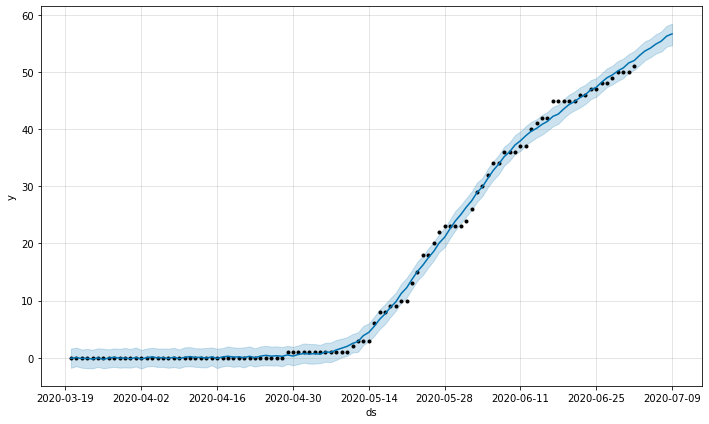

In [140]:
deaths_fore_cast_plot =  prophet.plot(prevision)

# Prevendo o Número de Mortes para os próximos 15 dias

In [141]:
#Parâmetro que recebe a quantidade de dias.
deaths_15 = prophet.make_future_dataframe(periods=15)
#Verificando quais serão esses próximos x dias
deaths_15.tail(15)

,ds
105,2020-07-03
106,2020-07-04
107,2020-07-05
108,2020-07-06
109,2020-07-07
110,2020-07-08
111,2020-07-09
112,2020-07-10
113,2020-07-11
114,2020-07-12


In [142]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(deaths_15)
prevision.tail(15)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
105,2020-07-03,52.839482,51.328637,54.477165,52.772418,52.903648,0.044451,0.044451,0.044451,0.044451,0.044451,0.044451,0.0,0.0,0.0,52.883932
106,2020-07-04,53.507967,51.994303,55.359025,53.324665,53.683046,0.162939,0.162939,0.162939,0.162939,0.162939,0.162939,0.0,0.0,0.0,53.670906
107,2020-07-05,54.176453,52.395904,55.779001,53.828977,54.483276,-0.004793,-0.004793,-0.004793,-0.004793,-0.004793,-0.004793,0.0,0.0,0.0,54.171660
108,2020-07-06,54.844939,53.088795,56.428222,54.262128,55.345890,0.025492,0.025492,0.025492,0.025492,0.025492,0.025492,0.0,0.0,0.0,54.870431
109,2020-07-07,55.513424,53.600661,57.210616,54.695032,56.197039,-0.126406,-0.126406,-0.126406,-0.126406,-0.126406,-0.126406,0.0,0.0,0.0,55.387018
110,2020-07-08,56.181910,54.432375,58.014439,55.179227,57.096084,0.079917,0.079917,0.079917,0.079917,0.079917,0.079917,0.0,0.0,0.0,56.261827
111,2020-07-09,56.850396,54.671349,58.814211,55.629486,58.018632,-0.181600,-0.181600,-0.181600,-0.181600,-0.181600,-0.181600,0.0,0.0,0.0,56.668796
112,2020-07-10,57.518882,55.516144,59.625124,56.040720,58.982263,0.044451,0.044451,0.044451,0.044451,0.044451,0.044451,0.0,0.0,0.0,57.563332
113,2020-07-11,58.187367,55.877565,60.649645,56.331825,59.902506,0.162939,0.162939,0.162939,0.162939,0.162939,0.162939,0.0,0.0,0.0,58.350307
114,2020-07-12,58.855853,56.400852,61.286620,56.750285,60.815979,-0.004793,-0.004793,-0.004793,-0.004793,-0.004793,-0.004793,0.0,0.0,0.0,58.851060


In [143]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(15)

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-03,51.328637,52.883932,54.477165
106,2020-07-04,51.994303,53.670906,55.359025
107,2020-07-05,52.395904,54.171660,55.779001
108,2020-07-06,53.088795,54.870431,56.428222
109,2020-07-07,53.600661,55.387018,57.210616
110,2020-07-08,54.432375,56.261827,58.014439
111,2020-07-09,54.671349,56.668796,58.814211
112,2020-07-10,55.516144,57.563332,59.625124
113,2020-07-11,55.877565,58.350307,60.649645
114,2020-07-12,56.400852,58.851060,61.286620


In [144]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(15).round()

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-03,51.0,53.0,54.0
106,2020-07-04,52.0,54.0,55.0
107,2020-07-05,52.0,54.0,56.0
108,2020-07-06,53.0,55.0,56.0
109,2020-07-07,54.0,55.0,57.0
110,2020-07-08,54.0,56.0,58.0
111,2020-07-09,55.0,57.0,59.0
112,2020-07-10,56.0,58.0,60.0
113,2020-07-11,56.0,58.0,61.0
114,2020-07-12,56.0,59.0,61.0


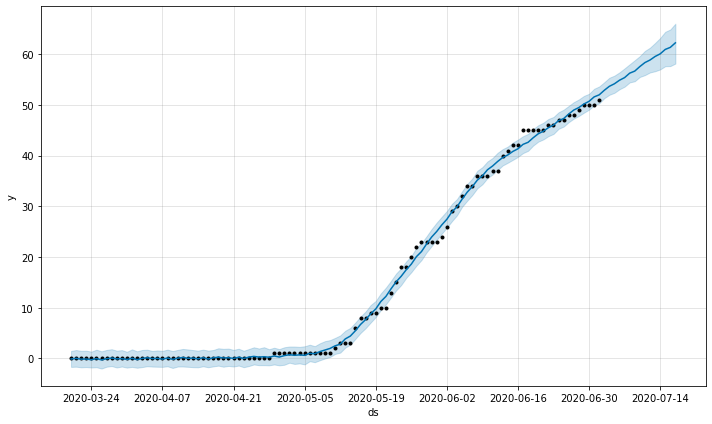

In [145]:
deaths =  prophet.plot(prevision)

# Prevendo o Número de Mortes para os próximos 30 dias

In [146]:
#Parâmetro que recebe a quantidade de dias.
deaths_30 = prophet.make_future_dataframe(periods=30)
#Verificando quais serão esses próximos x dias
deaths_30.tail(30)

,ds
105,2020-07-03
106,2020-07-04
107,2020-07-05
108,2020-07-06
109,2020-07-07
110,2020-07-08
111,2020-07-09
112,2020-07-10
113,2020-07-11
114,2020-07-12


In [147]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(deaths_30)
prevision.tail(30)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
105,2020-07-03,52.839482,51.119387,54.551881,52.797676,52.883715,0.044451,0.044451,0.044451,0.044451,0.044451,0.044451,0.0,0.0,0.0,52.883932
106,2020-07-04,53.507967,51.941713,55.276781,53.354195,53.651042,0.162939,0.162939,0.162939,0.162939,0.162939,0.162939,0.0,0.0,0.0,53.670906
107,2020-07-05,54.176453,52.460866,55.756688,53.863939,54.470610,-0.004793,-0.004793,-0.004793,-0.004793,-0.004793,-0.004793,0.0,0.0,0.0,54.171660
108,2020-07-06,54.844939,53.236534,56.574699,54.380475,55.312355,0.025492,0.025492,0.025492,0.025492,0.025492,0.025492,0.0,0.0,0.0,54.870431
109,2020-07-07,55.513424,53.789728,57.060852,54.834202,56.191184,-0.126406,-0.126406,-0.126406,-0.126406,-0.126406,-0.126406,0.0,0.0,0.0,55.387018
110,2020-07-08,56.181910,54.454285,58.127578,55.312934,57.093044,0.079917,0.079917,0.079917,0.079917,0.079917,0.079917,0.0,0.0,0.0,56.261827
111,2020-07-09,56.850396,54.611737,58.721213,55.745347,58.038937,-0.181600,-0.181600,-0.181600,-0.181600,-0.181600,-0.181600,0.0,0.0,0.0,56.668796
112,2020-07-10,57.518882,55.507566,59.754547,56.151180,58.971209,0.044451,0.044451,0.044451,0.044451,0.044451,0.044451,0.0,0.0,0.0,57.563332
113,2020-07-11,58.187367,56.061781,60.870906,56.578582,59.914132,0.162939,0.162939,0.162939,0.162939,0.162939,0.162939,0.0,0.0,0.0,58.350307
114,2020-07-12,58.855853,56.349945,61.330235,57.006937,60.800248,-0.004793,-0.004793,-0.004793,-0.004793,-0.004793,-0.004793,0.0,0.0,0.0,58.851060


In [148]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(30)

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-03,51.119387,52.883932,54.551881
106,2020-07-04,51.941713,53.670906,55.276781
107,2020-07-05,52.460866,54.171660,55.756688
108,2020-07-06,53.236534,54.870431,56.574699
109,2020-07-07,53.789728,55.387018,57.060852
110,2020-07-08,54.454285,56.261827,58.127578
111,2020-07-09,54.611737,56.668796,58.721213
112,2020-07-10,55.507566,57.563332,59.754547
113,2020-07-11,56.061781,58.350307,60.870906
114,2020-07-12,56.349945,58.851060,61.330235


In [149]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(30).round()

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-03,51.0,53.0,55.0
106,2020-07-04,52.0,54.0,55.0
107,2020-07-05,52.0,54.0,56.0
108,2020-07-06,53.0,55.0,57.0
109,2020-07-07,54.0,55.0,57.0
110,2020-07-08,54.0,56.0,58.0
111,2020-07-09,55.0,57.0,59.0
112,2020-07-10,56.0,58.0,60.0
113,2020-07-11,56.0,58.0,61.0
114,2020-07-12,56.0,59.0,61.0


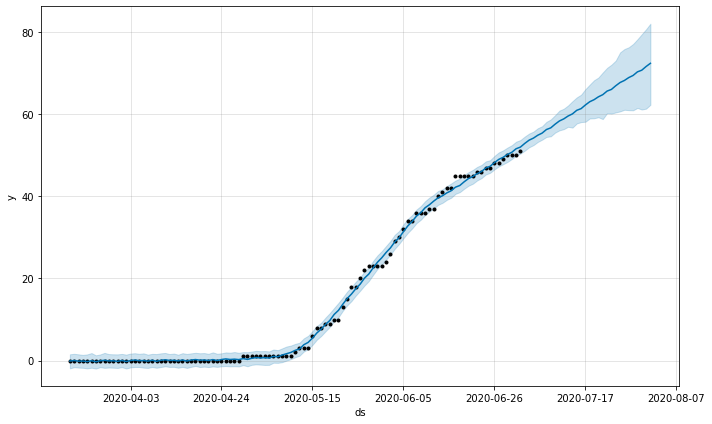

In [150]:
deaths_fore_cast_plot =  prophet.plot(prevision)

**Observe que quanto maior a quantidade de dias, maior a "margem" de erro estabelecida, isso se dá devido a baixa quantidade de dados para o treinamento do modelo.**

# Estudando a Correlação 

In [151]:
#Iniciando Data Frame vazio.
df_correlation = pd.DataFrame()

In [152]:
#Preenchendo Data Frame a partir da concatenação de 2 Series no Data Frame Original.
df_correlation = pd.concat([df['confirmados'], df['obitos']], ignore_index=True, axis=1)

In [153]:
#Renomeando as Colunas do Novo Data Frame e visualizando às 10 últimas linhas.
df_correlation.columns = [['Confirmados', 'Mortes']]
df_correlation.tail(10)

,Confirmados,Mortes
95,1967,46
96,2014,47
97,2068,47
98,2118,48
99,2149,48
100,2160,49
101,2189,50
102,2225,50
103,2248,50
104,2292,51


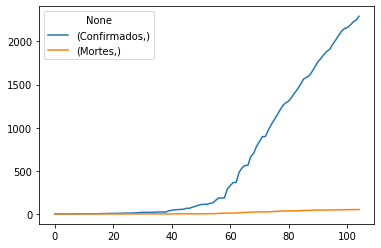

In [154]:
#Plotando Gráfico de Linha
df_correlation.plot()

Será utilizado o método de Pearson para identificar a correlação entre as duas variáveis.


**Se as duas variáveis possuem o mesmo tipo de comportamento (ex: uma sobe e a outra sobe, ou uma sobe e a outra desce = correlação positiva).**

**Se as duas variáveis possuem o diferentes tipos de comportamento (ex: uma sobe e a outra desce, ou uma desce e a outra sobe = correlação negativa).**

In [155]:
#Utilizando Método que calcula o coeficiente de Correlação através do Método de Pearson.
df_correlation.corr(method='pearson')

,Confirmados,Mortes
Confirmados,1.000000,0.994593
Mortes,0.994593,1.000000


**É possível verificar a alta correlação positiva, sinalizando uma possibilidade: Quantos mais casos confirmados, mais mortes.**

No entanto, apenas pelo coeficiente de correlação não é possível fazer afirmações como esta, mesmo que o cenário pareça "óbvio", faz-se necessário a realização de testes estatísticos.

Podemos realizar esse estudo utilizando uma outra Biblioteca do Python, a Scipy. Para isso vamos preparar os dados para o formato adequado.

In [156]:
confirmed = df['confirmados'].values
confirmed

array([   0,    0,    0,    0,    0,    0,    0,    0,    2,    2,    2,
          2,    2,    2,    2,    2,    4,    4,    4,    6,    6,    6,
          7,    7,    9,    9,   10,   11,   13,   15,   18,   18,   18,
         19,   19,   22,   22,   22,   22,   36,   42,   47,   50,   52,
         54,   65,   65,   77,   88,   99,  109,  111,  112,  121,  128,
        157,  185,  185,  185,  289,  329,  364,  364,  481,  533,  562,
        562,  663,  703,  785,  840,  897,  897,  972, 1034, 1091, 1147,
       1204, 1259, 1289, 1310, 1353, 1403, 1449, 1501, 1562, 1582, 1603,
       1652, 1709, 1767, 1802, 1850, 1885, 1909, 1967, 2014, 2068, 2118,
       2149, 2160, 2189, 2225, 2248, 2292])

In [157]:
deaths = df['obitos'].values
deaths

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  3,  3,  3,  6,  8,  8,  9,  9, 10, 10, 13, 15, 18, 18, 20,
       22, 23, 23, 23, 23, 24, 26, 29, 30, 32, 34, 34, 36, 36, 36, 37, 37,
       40, 41, 42, 42, 45, 45, 45, 45, 45, 46, 46, 47, 47, 48, 48, 49, 50,
       50, 50, 51])

In [158]:
#Importando o módulo stats da biblioteca scipy.
from scipy import stats 
#Aplicando o método que calcula o coeficiente de correlação, através do método de Pearson para as variáveis Casos e Mortes.
stats.pearsonr(confirmed, deaths)

(0.9945934906873615, 3.84150436412787e-103)

**A aplicação do Método retorna dois valores, o primeiro é o coeficiente de correlção (já visto acima) e o segundo o p-value.**

O p-value ou valor-p" é a probabilidade de se obter uma estatística de teste igual ou mais extrema que aquela observada em uma amostra, sob a hipótese nula.

Para determinar se o coeficiente de correlação é significativo:

Geralmente utiliza-se 0.05 de significância, o que significa que a probabilidade de ser estimado que uma correlação existe quando ela não existe é de 5% (Falso Positivo).

Se o p <= a: Correlação estatisticamente significativa.

Se o p > a: Correlação não é estatisticamente significativa.

Com 0.05 de significância, as duas variáveis (casos confirmados, mortes) possuem correlação estatisticamente significativa.

In [159]:
#A nível de exploração estatística, podemos utilizar outros métodos para o cálculo do coeficiente.
stats.spearmanr(confirmed, deaths)

SpearmanrResult(correlation=0.9715679555260585, pvalue=2.8884887353610963e-66)